In [3]:
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys; sys.path.append('../../PGDL/sample_code_submission/')
from internal_rep.matrix_funcs import \
    get_KF_Schatten_norms, \
    compute_complexity, \
    get_df_tau, \
    evalues_from_regions, \
    get_local_rad_bound

## Width

In [149]:
n_units_list = [4, 8, 16, 32, 48, 64, 80, 100]
n_train = 1000
n_test = 10000

In [150]:
train_eval_mat_list = [
    np.load(f'./width_results/relu_net_units={n_units}_train_evalues.npy') for n_units in n_units_list
]
test_eval_mat_list = [
    np.load(f'./width_results/relu_net_units={n_units}_test_evalues.npy') for n_units in n_units_list
]

In [151]:
results_dict_list = []
for n_units in n_units_list:
    with open(f'./width_results/relu_net_units={n_units}_results_dict.pkl', 'rb') as f:
        results_dict_list.append(pickle.load(f))

In [152]:
error_train = 1 - np.asarray([d['train_accuracy'] for d in results_dict_list])
error_test = 1 - np.asarray([d['test_accuracy'] for d in results_dict_list])

In [153]:
n_activated_mat_train = np.sum(np.asarray(train_eval_mat_list) > 0, axis=-1) / n_train
n_activated_mat_test = np.sum(np.asarray(test_eval_mat_list) > 0, axis=-1) / n_test

In [154]:
h_star_mat_train = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in train_eval_mat_list
]
h_star_mat_test = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in test_eval_mat_list
]

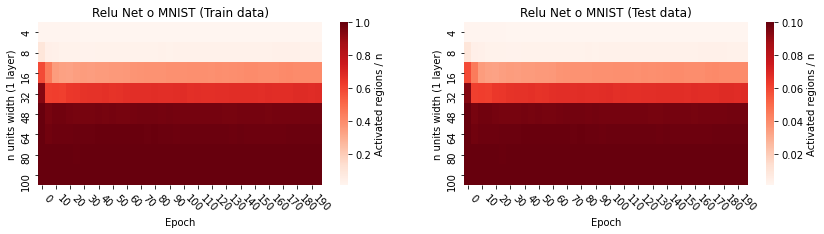

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
ax = axes[0]
sns.heatmap(n_activated_mat_train, cmap='Reds', ax=ax, cbar_kws={'label': 'Activated regions / n'})#, norm=matplotlib.colors.LogNorm())
ax.set_yticklabels(n_units_list)
ax.set_ylabel('n units width (1 layer)')
ax.set_xticklabels(np.arange(0, 200, 10), rotation = -45, ha="left")
ax.set_xlabel('Epoch')
ax.set_title('Relu Net o MNIST (Train data)')
ax = axes[1]
sns.heatmap(n_activated_mat_test, cmap='Reds', ax=ax, cbar_kws={'label': 'Activated regions / n'})#, norm=matplotlib.colors.LogNorm())
ax.set_yticklabels(n_units_list)
ax.set_ylabel('n units width (1 layer)')
ax.set_xticklabels(np.arange(0, 200, 10), rotation = -45, ha="left")
ax.set_xlabel('Epoch')
ax.set_title('Relu Net o MNIST (Test data)')
plt.show()

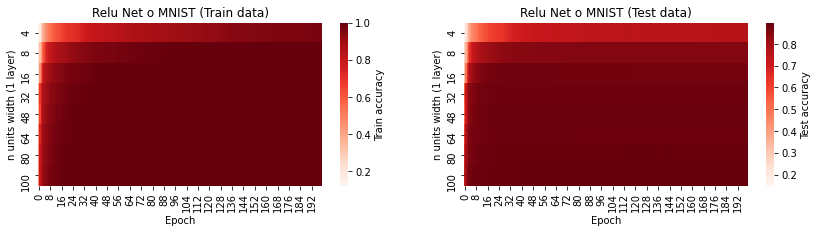

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))
ax = axes[0]
sns.heatmap(accuracy_train, cmap='Reds', ax=ax, cbar_kws={'label': 'Train accuracy'})#, norm=matplotlib.colors.LogNorm())
ax.set_yticklabels(n_units_list)
ax.set_ylabel('n units width (1 layer)')
# ax.set_xticklabels(np.arange(0, 200, 10), rotation = -45, ha="left")
ax.set_xlabel('Epoch')
ax.set_title('Relu Net o MNIST (Train data)')
ax = axes[1]
sns.heatmap(accuracy_test, cmap='Reds', ax=ax, cbar_kws={'label': 'Test accuracy'})#, norm=matplotlib.colors.LogNorm())
ax.set_yticklabels(n_units_list)
ax.set_ylabel('n units width (1 layer)')
# ax.set_xticklabels(np.arange(0, 200, 10), rotation = -45, ha="left")
ax.set_xlabel('Epoch')
ax.set_title('Relu Net o MNIST (Test data)')
plt.show()

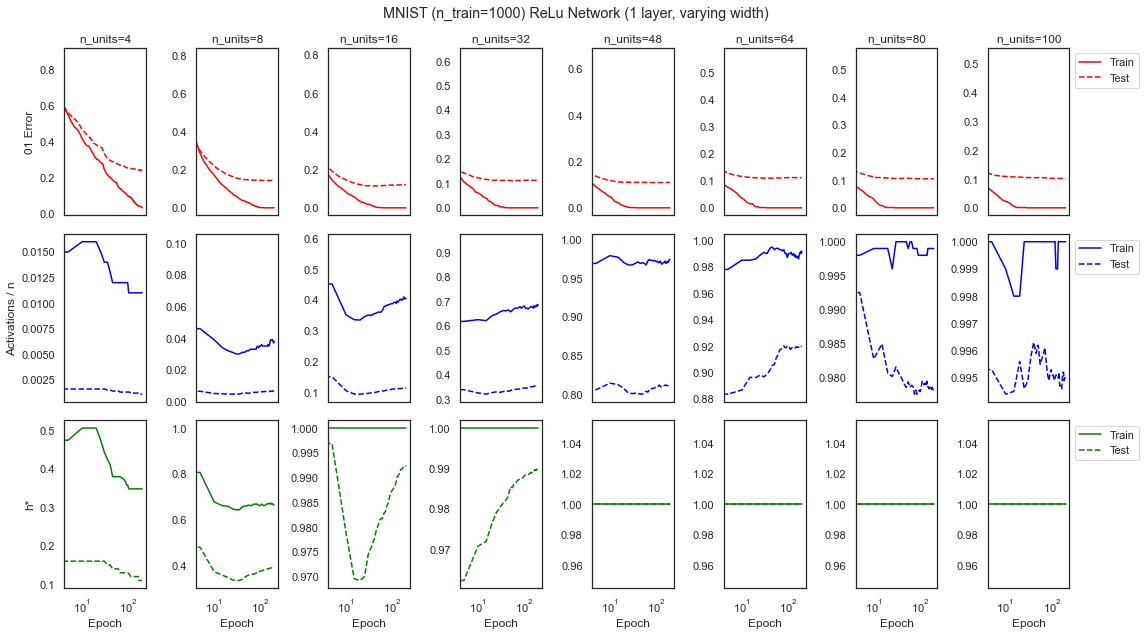

In [155]:
sns.set_context('notebook')
sns.set_style('white')

plot_list = [
    (error_train, error_test, 'red', '01 Error'),
    (np.asarray(n_activated_mat_train), np.asarray(n_activated_mat_test), 'blue', 'Activations / n'),
    (np.asarray(h_star_mat_train)*np.sqrt(n_train), np.asarray(h_star_mat_test)*np.sqrt(n_test), 'green', 'h*'),
]

n_cols = len(plot_list[0][0])
n_rows = len(plot_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 3*n_rows), sharex=True)#, sharey='row')

for row, (train_all, test_all, c, label) in zip(range(n_rows), plot_list):
    for col, train, test in zip(range(n_cols), train_all, test_all):
        epochs = np.linspace(0, 200, len(train))
        ax = axes[row, col]
        ax.plot(epochs, train, c=c, label='Train')
        ax.plot(epochs, test, c=c, ls='--', label='Test')
        ax.set_xscale('log')
#         if row > 0:
#             ax.set_yscale('log')
        if col == 0:
            ax.set_ylabel(label)
        if col == n_cols-1:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        if row == 0:
            ax.set_title(f'n_units={n_units_list[col]}')
        if row == n_rows - 1:
            ax.set_xlabel('Epoch')

plt.suptitle(
    f'MNIST (n_train={n_train}) ' +
    f'ReLu Network (1 layer, varying width)')
plt.tight_layout()
plt.show()

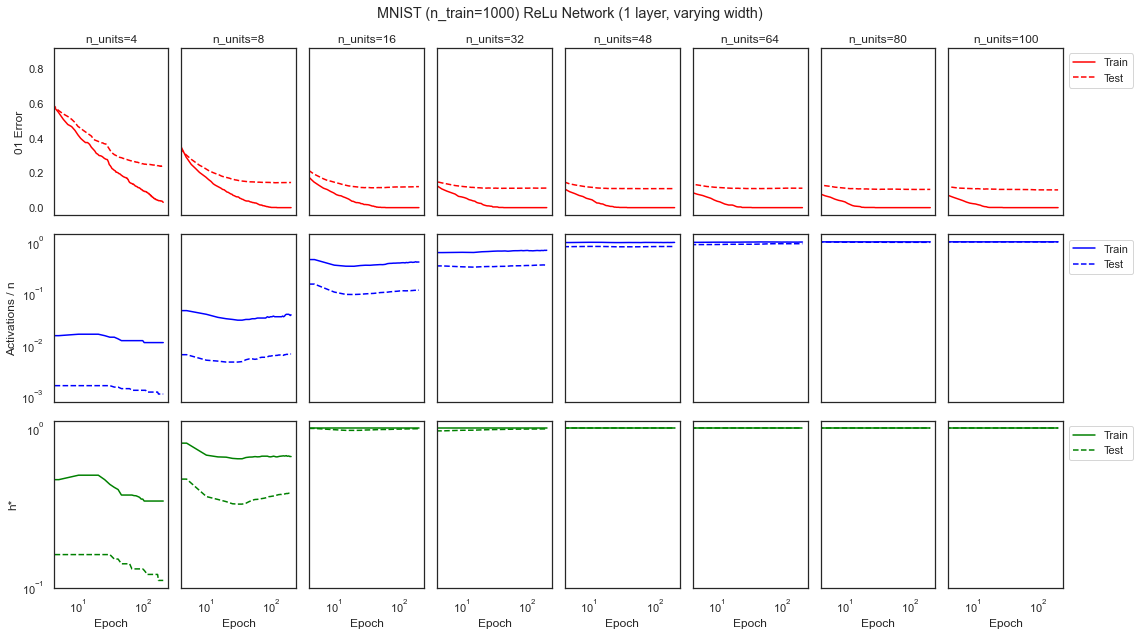

In [156]:
sns.set_context('notebook')
sns.set_style('white')

plot_list = [
    (error_train, error_test, 'red', '01 Error'),
    (np.asarray(n_activated_mat_train), np.asarray(n_activated_mat_test), 'blue', 'Activations / n'),
    (np.asarray(h_star_mat_train)*np.sqrt(n_train), np.asarray(h_star_mat_test)*np.sqrt(n_test), 'green', 'h*'),
]

n_cols = len(plot_list[0][0])
n_rows = len(plot_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*n_cols, 3*n_rows), sharex=True, sharey='row')

for row, (train_all, test_all, c, label) in zip(range(n_rows), plot_list):
    for col, train, test in zip(range(n_cols), train_all, test_all):
        epochs = np.linspace(0, 200, len(train))
        ax = axes[row, col]
        ax.plot(epochs, train, c=c, label='Train')
        ax.plot(epochs, test, c=c, ls='--', label='Test')
        ax.set_xscale('log')
        if row > 0:
            ax.set_yscale('log')
        if col == 0:
            ax.set_ylabel(label)
        if col == n_cols-1:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        if row == 0:
            ax.set_title(f'n_units={n_units_list[col]}')
        if row == n_rows - 1:
            ax.set_xlabel('Epoch')

plt.suptitle(
    f'MNIST (n_train={n_train}) ' +
    f'ReLu Network (1 layer, varying width)')
plt.tight_layout()
plt.show()

## Depth plots

In [137]:
depth_list = [1, 2, 3, 4]
n_train = 1000
n_test = 10000
n_units = 8

### Penultimate

In [138]:
mat_key = 'penultimate'

train_eval_mat_list = [
    np.load(f'./depth_results/relu_net_units={n_units}_depth={depth}_train_{mat_key}_evalues.npy')
    for depth in depth_list]

test_eval_mat_list = [
    np.load(f'./depth_results/relu_net_units={n_units}_depth={depth}_test_{mat_key}_evalues.npy')
    for depth in depth_list]

results_dict_list = []
for depth in depth_list:
    with open(f'./depth_results/relu_net_units={n_units}_depth={depth}_results_dict.pkl', 'rb') as f:
        results_dict_list.append(pickle.load(f))

In [139]:
error_train = 1 - np.asarray([d['train_accuracy'] for d in results_dict_list])
error_test = 1 - np.asarray([d['test_accuracy'] for d in results_dict_list])

n_activated_mat_train = np.sum(np.asarray(train_eval_mat_list) > 0, axis=-1) / n_train
n_activated_mat_test = np.sum(np.asarray(test_eval_mat_list) > 0, axis=-1) / n_test

h_star_mat_train = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in train_eval_mat_list]
h_star_mat_test = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in test_eval_mat_list]

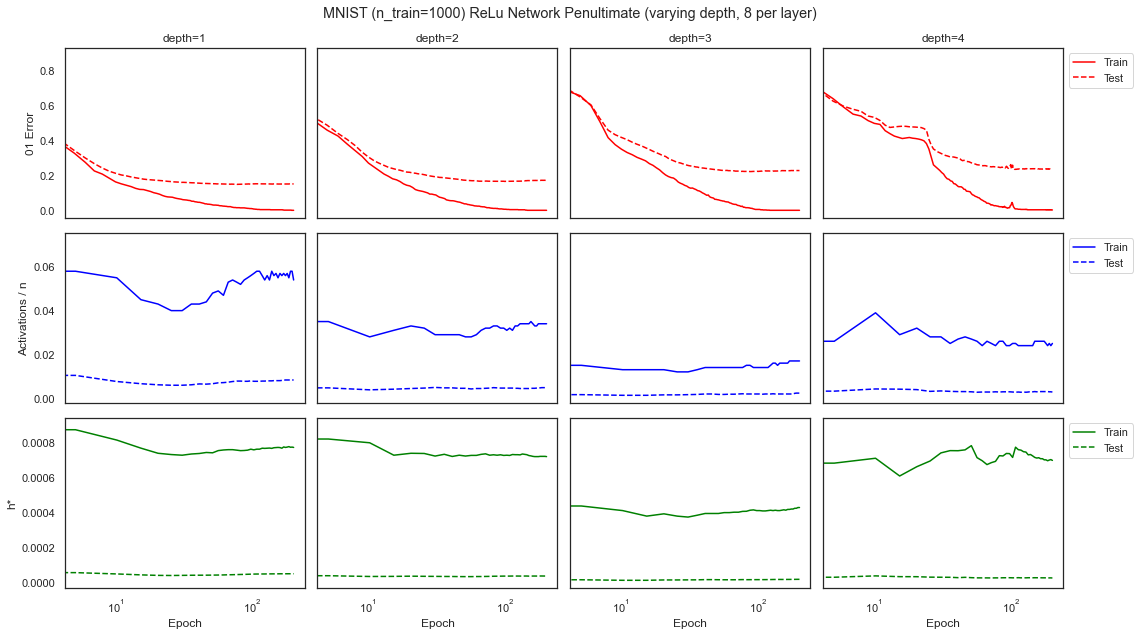

In [141]:
sns.set_context('notebook')
sns.set_style('white')

plot_list = [
    (error_train, error_test, 'red', '01 Error'),
    (np.asarray(n_activated_mat_train), np.asarray(n_activated_mat_test), 'blue', 'Activations / n'),
    (np.asarray(h_star_mat_train)*np.sqrt(n_train), np.asarray(h_star_mat_test)*np.sqrt(n_test), 'green', 'h*'),
]

n_cols = len(plot_list[0][0])
n_rows = len(plot_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), sharex=True)#, sharey='row')

for row, (train_all, test_all, c, label) in zip(range(n_rows), plot_list):
    for col, train, test in zip(range(n_cols), train_all, test_all):
        epochs = np.linspace(0, 200, len(train))
        ax = axes[row, col]
        ax.plot(epochs, train, c=c, label='Train')
        ax.plot(epochs, test, c=c, ls='--', label='Test')
        ax.set_xscale('log')
#         if row > 0:
#             ax.set_yscale('log')
        if col == 0:
            ax.set_ylabel(label)
        if col == n_cols-1:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        if row == 0:
            ax.set_title(f'depth={depth_list[col]}')
        if row == n_rows - 1:
            ax.set_xlabel('Epoch')

plt.suptitle(
    f'MNIST (n_train={n_train}) ' +
    f'ReLu Network Penultimate (varying depth, {n_units} per layer)')
plt.tight_layout()
plt.show()

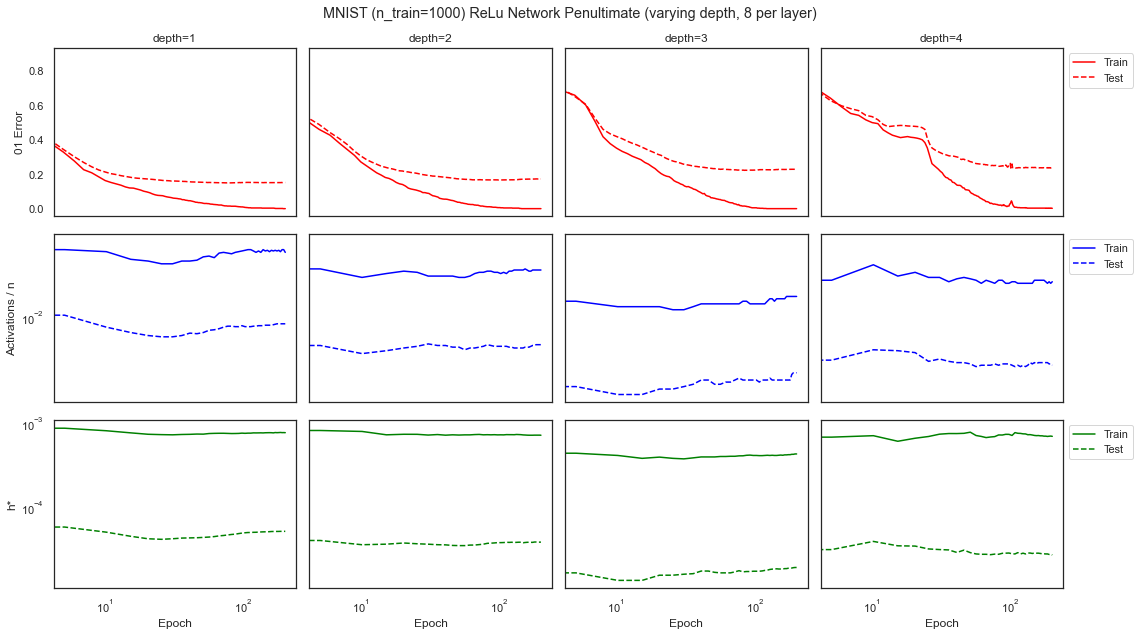

In [140]:
sns.set_context('notebook')
sns.set_style('white')

plot_list = [
    (error_train, error_test, 'red', '01 Error'),
    (np.asarray(n_activated_mat_train), np.asarray(n_activated_mat_test), 'blue', 'Activations / n'),
    (np.asarray(h_star_mat_train)/np.sqrt(n_train), np.asarray(h_star_mat_test)/np.sqrt(n_test), 'green', 'h*'),
]

n_cols = len(plot_list[0][0])
n_rows = len(plot_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), sharex=True, sharey='row')

for row, (train_all, test_all, c, label) in zip(range(n_rows), plot_list):
    for col, train, test in zip(range(n_cols), train_all, test_all):
        epochs = np.linspace(0, 200, len(train))
        ax = axes[row, col]
        ax.plot(epochs, train, c=c, label='Train')
        ax.plot(epochs, test, c=c, ls='--', label='Test')
        ax.set_xscale('log')
        if row > 0:
            ax.set_yscale('log')
        if col == 0:
            ax.set_ylabel(label)
        if col == n_cols-1:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        if row == 0:
            ax.set_title(f'depth={depth_list[col]}')
        if row == n_rows - 1:
            ax.set_xlabel('Epoch')

plt.suptitle(
    f'MNIST (n_train={n_train}) ' +
    f'ReLu Network Penultimate (varying depth, {n_units} per layer)')
plt.tight_layout()
plt.show()

### full internal rep

In [142]:
mat_key = 'internal'

train_eval_mat_list = [
    np.load(f'./depth_results/relu_net_units={n_units}_depth={depth}_train_{mat_key}_evalues.npy') for depth in depth_list
]
test_eval_mat_list = [
    np.load(f'./depth_results/relu_net_units={n_units}_depth={depth}_test_{mat_key}_evalues.npy') for depth in depth_list
]

results_dict_list = []
for depth in depth_list:
    with open(f'./depth_results/relu_net_units={n_units}_depth={depth}_results_dict.pkl', 'rb') as f:
        results_dict_list.append(pickle.load(f))

In [143]:
error_train = 1 - np.asarray([d['train_accuracy'] for d in results_dict_list])
error_test = 1 - np.asarray([d['test_accuracy'] for d in results_dict_list])

n_activated_mat_train = np.sum(np.asarray(train_eval_mat_list) > 0, axis=-1) / n_train
n_activated_mat_test = np.sum(np.asarray(test_eval_mat_list) > 0, axis=-1) / n_test

h_star_mat_train = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in train_eval_mat_list]
h_star_mat_test = [
    [get_local_rad_bound(evals, from_evalues=True)[0] for evals in epochs_vs_evals]
    for epochs_vs_evals in test_eval_mat_list]

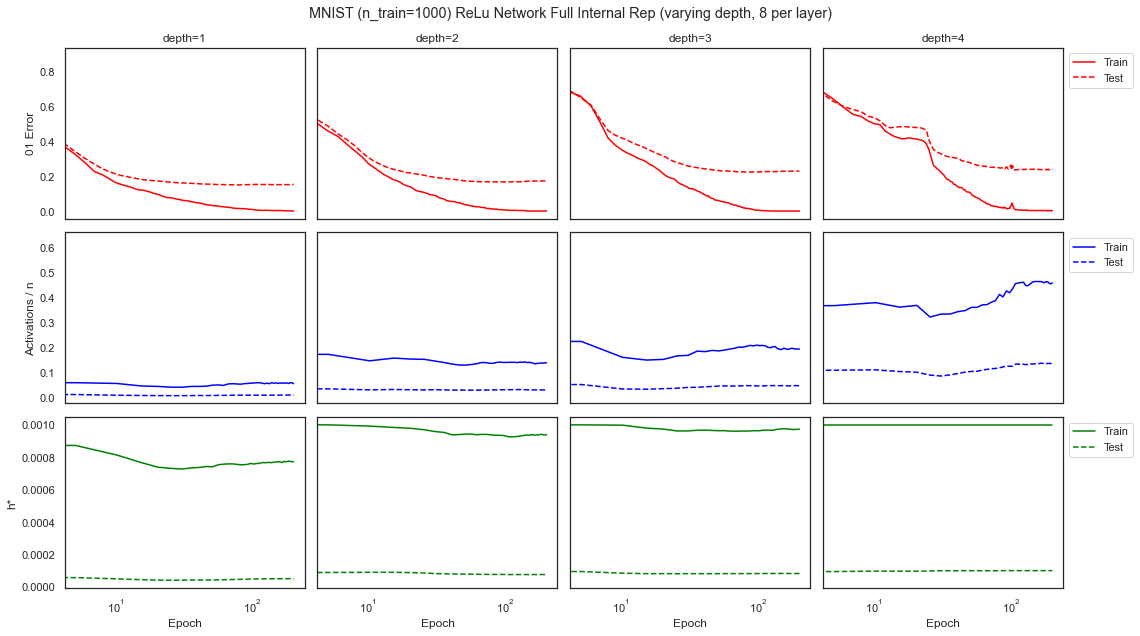

In [144]:
sns.set_context('notebook')
sns.set_style('white')

plot_list = [
    (error_train, error_test, 'red', '01 Error'),
    (np.asarray(n_activated_mat_train), np.asarray(n_activated_mat_test), 'blue', 'Activations / n'),
    (np.asarray(h_star_mat_train)/np.sqrt(n_train), np.asarray(h_star_mat_test)/np.sqrt(n_test), 'green', 'h*'),
]

n_cols = len(plot_list[0][0])
n_rows = len(plot_list)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), sharex=True, sharey='row')

for row, (train_all, test_all, c, label) in zip(range(n_rows), plot_list):
    for col, train, test in zip(range(n_cols), train_all, test_all):
        epochs = np.linspace(0, 200, len(train))
        ax = axes[row, col]
        ax.plot(epochs, train, c=c, label='Train')
        ax.plot(epochs, test, c=c, ls='--', label='Test')
        ax.set_xscale('log')
#         if row > 0:
#             ax.set_yscale('log')
        if col == 0:
            ax.set_ylabel(label)
        if col == n_cols-1:
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        if row == 0:
            ax.set_title(f'depth={depth_list[col]}')
        if row == n_rows - 1:
            ax.set_xlabel('Epoch')

plt.suptitle(
    f'MNIST (n_train={n_train}) ' +
    f'ReLu Network Full Internal Rep (varying depth, {n_units} per layer)')
plt.tight_layout()
plt.show()